Analyzing Trending Tags of Youtube(GBvideos)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
videos=pd.read_csv('F:/PRACTICE/Dataset/GBvideos.csv', error_bad_lines=False)

b'Skipping line 2398: expected 11 fields, saw 21\nSkipping line 2797: expected 11 fields, saw 21\n'


In [3]:
videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,jt2OHQh0HoQ,Live Apple Event - Apple September Event 2017 ...,Apple Event,28,apple events|apple event|iphone 8|iphone x|iph...,7426393,78240,13548,705,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,13.09
1,AqokkXoa7uE,Holly and Phillip Meet Samantha the Sex Robot ...,This Morning,24,this morning|interview|holly willoughby|philli...,494203,2651,1309,0,https://i.ytimg.com/vi/AqokkXoa7uE/default.jpg,13.09
2,YPVcg45W0z4,My DNA Test Results! I'm WHAT?!,emmablackery,24,emmablackery|emma blackery|emma|blackery|briti...,142819,13119,151,1141,https://i.ytimg.com/vi/YPVcg45W0z4/default.jpg,13.09
3,T_PuZBdT2iM,getting into a conversation in a language you ...,ProZD,1,skit|korean|language|conversation|esl|japanese...,1580028,65729,1529,3598,https://i.ytimg.com/vi/T_PuZBdT2iM/default.jpg,13.09
4,NsjsmgmbCfc,Baby Name Challenge!,Sprinkleofglitter,26,sprinkleofglitter|sprinkle of glitter|baby gli...,40592,5019,57,490,https://i.ytimg.com/vi/NsjsmgmbCfc/default.jpg,13.09


In [4]:
tags_complete=' '.join(videos['tags'])

In [5]:
tags_complete

"apple events|apple event|iphone 8|iphone x|iphone 8 plus|iphone 7s|iphone 7s plus|ios 11 this morning|interview|holly willoughby|phillip schofield|ruth langsford|eamonn holmes|chat shows - topic|chat show - topic|talk shows - topic|sex robot|samantha|real life emmablackery|emma blackery|emma|blackery|british vlogger|british youtuber|female vlogger|birdyboots|dna test|23andme|ancestry skit|korean|language|conversation|esl|japanese|foreign|communication|don't speak|struggle|foreigner|lotte mart|korea|south|weather|good|tutorial sprinkleofglitter|sprinkle of glitter|baby glitter|Louise Pentland|Louise Pentland Baby Name|Mrs Meldrum|Baby Names|Nice baby names|Unusual baby names Rio Ferdinand|Rio|Ferdinand|5 Magazine|5 Mag|#5|5 Rio Ferdinand|Rio Ferdinand interview|football|soccer|interview|Manchester United|Man United|fifa 18|fut 18|fut|fifa ratings|fifa 18 ratings|chelsea|chelsea fc|chelsea f.c|David Luiz|Eden Hazard|Christensen|Premier League|Champions League|Fifa18|Hazard Fifa 18|David

In [6]:
import re

In [7]:
tags=re.sub('[^a-zA-Z]', ' ', tags_complete)

In [8]:
tags=re.sub(' +', ' ', tags)

In [9]:
from wordcloud import WordCloud, STOPWORDS

In [10]:
wordcloud=WordCloud(width=1000, height=500, stopwords=set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

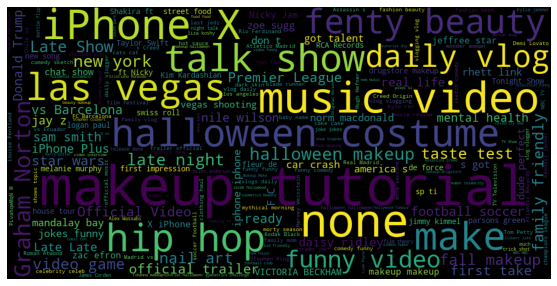

In [11]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Perform Analysis on; likes, views and dislikes, and find how they are co-related with each other.

In [12]:
videos['views']

0       7426393
1        494203
2        142819
3       1580028
4         40592
         ...   
7988     118453
7989      76096
7990     170003
7991     893125
7992    1474925
Name: views, Length: 7993, dtype: int64

In [13]:
videos.isna().sum()
videos.dropna().sum()

video_id          jt2OHQh0HoQAqokkXoa7uEYPVcg45W0z4T_PuZBdT2iMNs...
title             Live Apple Event - Apple September Event 2017 ...
channel_title     Apple EventThis MorningemmablackeryProZDSprink...
category_id                                                  157768
tags              apple events|apple event|iphone 8|iphone x|iph...
views                                                    8878085581
likes                                                     310605285
dislikes                                                   12220169
comment_total                                              39898108
thumbnail_link    https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...
date                                                         128598
dtype: object

Text(0.5, 1.0, 'Regression Plot of Views and Likes')

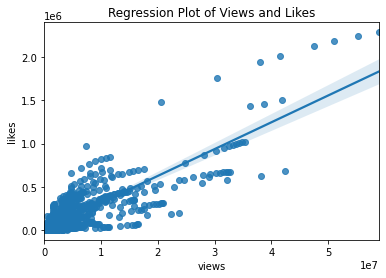

In [15]:
sns.regplot(data=videos, x='views', y='likes')
plt.title('Regression Plot of Views and Likes')

Text(0.5, 1.0, 'Regression Plot of Views and Dislikes')

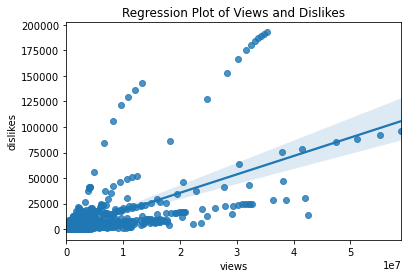

In [18]:
sns.regplot(data=videos, x='views', y='dislikes')
plt.title('Regression Plot of Views and Dislikes')

Relationship between Views, Dislikes and Likes

Correlation Matrix

In [19]:
df_corr=videos[['views', 'likes', 'dislikes']]

In [20]:
df_corr.corr()

,views,likes,dislikes
views,1.000000,0.866249,0.671703
likes,0.866249,1.000000,0.623797
dislikes,0.671703,0.623797,1.000000


There is strong direct correlation of 0.866 between views and likes and an intermediate correlation of 0.672 between between dislikes and views,

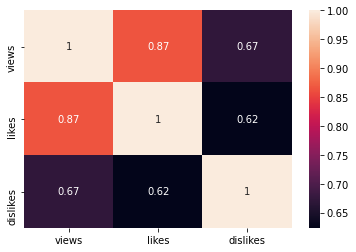

In [22]:
sns.heatmap(df_corr.corr(), annot=True)

Views and Likes have the strongest correlation of 0.87.